<a href="https://colab.research.google.com/github/gusfcc/trabaed2/blob/main/trabGrafos_gustavo_mateus_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Divisão:

*   Gustavo Fernandes Carneiro de Castro - 11369684
    1.   Percurso em Largura
    2.   Caminho mais curto a partir de uma única origem

*   Mateus Miquelino da Silva - 11208412
    1.   Percurso em Profundidade
    2.   Árvore espalhada mínima

*   Ambos:
    1.   Revisão
    2.   Criação dos grafos de exemplo
    3. Testes






## Enunciado:

Desenvolver códigos Python para implementar as seguintes tarefas sobre grafos:


1.   Percurso em profundidade e percurso em largura (peso=50%);
2.   Um algoritmo para árvore espalhada mínima (escolher entre os algoritmos de
Kruskal e Prim) (peso=25%);
3.   Um algoritmo para caminho mais curto a partir de uma única origem (escolher
entre os algoritmos de Bellman-Ford e Dijkstra) (peso=25%).


# **Códigos Bases**


Grafos não ponderados e não direcionados:

In [ ]:
# Grafos não ponderados e não direcionados:
class Grafo:

    def __init__ (self, vertices):
        self.listaAdj = {}
        self.nvertices = vertices

    # arestas bidirecionais
    def add_aresta(self, vert1, vert2):
        if vert1 not in self.listaAdj:
            self.listaAdj[vert1] = []
        if vert2 not in self.listaAdj:
            self.listaAdj[vert2] = []
        self.listaAdj[vert1].append(vert2)
        self.listaAdj[vert2].append(vert1)

    def get_vertices(self) :
        # retorna list type e nao dict_keys type
        return (list(self.listaAdj.keys()))

    def get_adjacentes(self, vertice):
        return (self.listaAdj[vertice])

    def mostraLista(self):
        for x in self.listaAdj.items():
            print(x)

    def main():
        vertices = 4
        g = Grafo(vertices)
        g.add_aresta(0, 1)
        g.add_aresta(1, 2)
        g.add_aresta(2, 3)
        g.add_aresta(3, 0)
        g.add_aresta(3, 4)
        print ("Lista de adjacencia")

        g.mostraLista()
        v =3
        print ("Adjacentes a", v)

        k = g.get_adjacentes (v)
        print (k)

        print ("Vertices")
        v = g.get_vertices()
        print (v)
        
if __name__ == " __main__ " :
    main()

Grafos ponderados e direcionados:

In [ ]:
class Grafo(object):

    def __init__(self, vertices):
        self.vertices = {}
        self.nv = vertices
        
    def add_aresta(self, chave_de, chave_para, peso):
        if chave_de not in self.vertices:
            self.vertices[chave_de] = {}
        if chave_para not in self.vertices:
            self.vertices[chave_para] = {}
        self.vertices[chave_de][chave_para] = peso

    def mostraGrafo(self):
        for x in self.vertices.items():
            print(x)

    def get_vertices(self):
    # retorna list type e nao dict_keys type
        return (list(self.vertices.keys()))

    def get_adjacentes(self, chave):
        return (list(self.vertices[chave].keys()))

    def get_pesosAdjacentes(self, chave):
        return (list(self.vertices[chave].values()))

Classe de Vertices apresentada:

In [ ]:
class Vertice(object):
    def __init__(self, num, dist):
        self.num = num
        self.dist = dist # dado adicional = distancia
        
    def __repr__(self):
        return str(self.num) + "-" + str(self.dist)

    def mudaDist(self, dist2):
        self.dist = dist2

Classe Tg para mostrar a aplicação da Classe Vertice:

In [ ]:
class Tg(object):
    def __init__(self, vertices):
        self.vertices = {}
        self.nv = vertices
        
    def add_aresta(self, chave_de:Vertice, chave_para:Vertice, peso):
        if chave_de not in self.vertices:
            self.vertices[chave_de] = {}
        if chave_para not in self.vertices:
            self.vertices[chave_para] = {}
        self.vertices[chave_de][chave_para] = peso
        
    def mostraGrafo(self):
        for x in self.vertices.items():
            print(x)

# **Percurso em Profundidade**

Classe Grafo utilizada para aplicar a busca em profundidade. Um grafo não ponderado e não direcionado

In [ ]:
# Grafos não ponderados e não direcionados:
class Grafo:

    def __init__(self, vertices):
        self.listaAdj = {}
        self.nvertices = vertices

    # arestas bidirecionais
    def add_aresta(self, vert1, vert2):
        if vert1 not in self.listaAdj:
            self.listaAdj[vert1] = []

        if vert2 not in self.listaAdj:
            self.listaAdj[vert2] = []

        self.listaAdj[vert1].append(vert2)
        self.listaAdj[vert2].append(vert1)

    def get_vertices(self):
        # retorna list type e nao dict_keys type
        return list(self.listaAdj.keys())

    def get_adjacentes(self, vertice):
        return self.listaAdj[vertice]

    def mostraLista(self):
        for x in self.listaAdj.items():
            print(x)


função percurso_pronfundidade(G, vert_inicial): recebe um garfo G e faz o percurso em profundidade de G, a partir de um vertice inicial (vert_inicial). A função retorna uma lista com os vertices percorridos em ordem, do vertice inicial até o ultimo vertice do grafo (vertice mais profundo) ou False caso o vert_inicial não pertença ao grafo G

In [ ]:
def percurso_profundidade(G, vert_inicial):
    # edges é a lista onde será salvo os vertices na sequencia em que a 
    # busca em profundidade percorre o grafo G, a partir do vertice 
    # inicial, representado pela var vert_inicial
    # Deve-se perguntar se o vert_inicial pertence ao grafo G ou não
    if vert_inicial not in G.get_vertices():
    
        # retorna False caso vert_inicial não pertence ao grafo G
        return False
    
    else:
        edges = [vert_inicial]
        # pp_recursiva é responsavel por percorrer o grafo G e salvar
        # os vertices percorridos em edges
        pp_recursiva(G, edges, edges)
        
        return edges

pp_recursiva recebe um grafo G no qual será feito o percurso em profundidade; edges_atual é uma lista que salva os vertices percorridos até aquele momento o percurso em profundidade e o ultimo elesmento de edges_atual é o vertice em que o percurso em profundidade está atualmente; e edges é uma lista  com os vertices percorridos em ordem, do vertice inicial (vert_inicial) até o ultimo vertice do grafo (vertice mais profundo).

In [ ]:
def pp_recursiva(G, edges_atual, edges):

    # edges_atual[-1] é o ultimo elemento da lista edges_atual, o qual
    # é o vertice em que estamos atualmente.
    # vert_adj percorre uma lista dos vertices adjacentes
    # do vertice em que estamos atualmente
    for vert_adj in G.listaAdj[edges_atual[-1]]:

        # para evitar um ciclo, deve-se fazer a pergunta:
        # já passamos por esse vertice adjacente?
        if vert_adj not in edges:

            # caso não tenha passado por esse vertice devemos
            # adicionar esse vertice em edges e continuar o percurso em
            # profundidade a partir do vertice adjacente escolhido
            edges.append(vert_adj)
            pp_recursiva(G, edges_atual + [vert_adj], edges)


Teste realizado a partir do grafo abaixo

In [ ]:
#Teste

# Criação de um Grafo
G = Grafo(8)
G.add_aresta(0, 3)
G.add_aresta(0, 5)
G.add_aresta(0, 6)
G.add_aresta(2, 4)
G.add_aresta(3, 4)
G.add_aresta(3, 7)
G.add_aresta(5, 1)
G.add_aresta(5, 6)
G.add_aresta(6, 7)

#Testes
print("v = 0")
print(percurso_profundidade(G, 0))
print('\n')

print("v = 5")
print(percurso_profundidade(G, 5))
print('\n')

print("v = 7")
print(percurso_profundidade(G, 7))
print("\n")

v = 0
[0, 3, 4, 2, 7, 6, 5, 1]


v = 5
[5, 0, 3, 4, 2, 7, 6, 1]


v = 7
[7, 3, 0, 5, 1, 6, 4, 2]




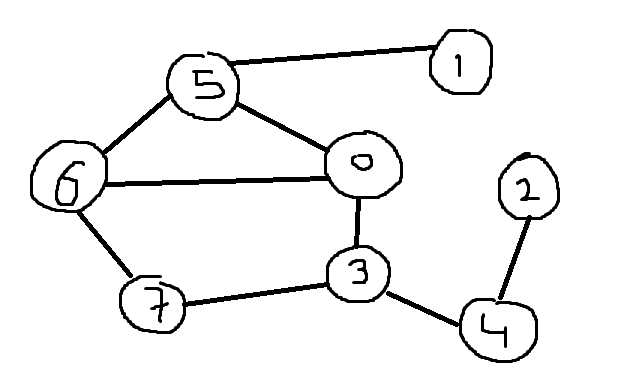

# **Percurso em Largura**

Classe Grafo utilizada para aplicar o percurso em largura. Um Grafo não-ponderado e não-direcionado.

In [ ]:
# Grafos não ponderados e não direcionados:
class Grafo:

    def __init__ (self, vertices):
        self.listaAdj = {}
        self.nvertices = vertices

    # arestas bidirecionais
    def add_aresta(self, vert1, vert2):
        if vert1 not in self.listaAdj:
            self.listaAdj[vert1] = []
        if vert2 not in self.listaAdj:
            self.listaAdj[vert2] = []
        self.listaAdj[vert1].append(vert2)
        self.listaAdj[vert2].append(vert1)

    def get_vertices(self) :
        # retorna list type e nao dict_keys type
        return (list(self.listaAdj.keys()))

    def get_adjacentes(self, vertice):
        return (self.listaAdj[vertice])

    def mostraLista(self):
        for x in self.listaAdj.items():
            print(x)

Função de percurso em largura BFS(G, v). Esta função utiliza de um sistema de cores para verificar quais vertices já foram analizados.

A função recebe um grafo G, e o vertice v no qual será analizada as distâncias para todos os outros vértices u. Retorna o percurso realizado em largura

In [ ]:
#Percurso em Largura
def BFS(G,v):

    # Declaração
    u_visited = {}  # Dict de col do grafo (alterado para "visitado")
    v_dist = {} # Dicionário das distâncias dos u até v
    u_pai = {} #Dicionário dos pais de u
    Q = []

    v_list = G.get_vertices() # Lista dos vertices de G
    v_list.remove(v) # Removendo o v (inicio) da lista de vertices
    
    # Inicialização
    for u in v_list:
        u_visited[u] = "no" # Declarando todos vert como não-visitados
        v_dist[u] = None # Vertices u a uma distancia infinita de v
                        # None - o valor numérico de inf não importa
        u_pai[u] = None # Todos sem pai
    
    u_visited[v] = "next" # Marcando como o próximo em análise
    v_dist[v] = 0 # Dist do início(v) ao início(v) = 0
    u_pai[v] = None # Início não tem pai

    Q = [] # Queue
    percurso = [] # List de vertices na ordem visitada (percurso)
    Q.insert(0, v) # Inserção de v no início

    # Algoritmo de BFS()
    while Q != []:
        
        u = Q.pop()
        u_adj = G.get_adjacentes(u) # lista de Vertices x adj a u
        percurso.insert(len(percurso), u) #Inserir valor de u no percurso

        # Marcação dos próx (x)/ aumento na dist de x /
        # adição dos pais de x como u / Sendo x os adjacesntes de u
        for x in u_adj:
            if u_visited[x] == "no":
                u_visited[x] = "next"
                v_dist[x] = v_dist[u] + 1
                u_pai[x] = u
                Q.insert(0, x)
        u_visited[u] = "yes" # Marcação de u como já visitado

    return percurso

Teste realizado a partir do grafo abaixo

In [ ]:
#Teste

# Criação de um grafo
G = Grafo(8)
G.add_aresta(0, 3)
G.add_aresta(0, 5)
G.add_aresta(0, 6)
G.add_aresta(2, 4)
G.add_aresta(3, 4)
G.add_aresta(3, 7)
G.add_aresta(5, 1)
G.add_aresta(5, 6)
G.add_aresta(6, 7)

#Testes
print("v = 0")
print(BFS(G, 0))
print('\n')

print("v = 5")
print(BFS(G, 5))
print('\n')

print("v = 7")
print(BFS(G, 7))
print('\n')

v = 0
[0, 3, 5, 6, 4, 7, 1, 2]


v = 5
[5, 0, 1, 6, 3, 7, 4, 2]


v = 7
[7, 3, 6, 0, 4, 5, 2, 1]




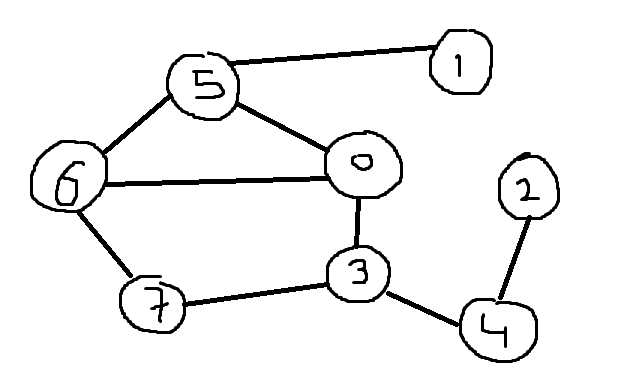

# **Árvore espalhada mínima**

Classe Grafo utilizada para aplicar o percurso em largura. Um Grafo ponderado e não-direcionado.

In [2]:
# Grafo ponderado não direcionado
class Grafo(object):

    def __init__(self, vertices):
        self.vertices = {}
        self.nv = vertices

    def add_aresta(self, vert1, vert2, peso):
        if vert1 not in self.vertices:
            self.vertices[vert1] = {}
        if vert2 not in self.vertices:
            self.vertices[vert2] = {}
        self.vertices[vert1][vert2] = peso
        self.vertices[vert2][vert1] = peso

    def mostraGrafo(self):
        for x in self.vertices.items():
            print(x)

    def get_vertices(self):
        # retorna list type e nao dict_keys type
        return list(self.vertices.keys())

    def get_adjacentes(self, chave):
        return list(self.vertices[chave].keys())
    def get_pesosAdjacentes(self, chave):
        return list(self.vertices[chave].values())

prim recebe um objeto G do tipo Grafo, o vertice inicial (vert_inicial) onde começará a ser formada a arvore espalhada minima. A função prim deve retornar uma lista que contem as arestas que fazem parte da arvore espalhada minima do grafo G ou False caso o vertice inicial dado não pertença ao grafo G

In [3]:
def prim(G, vert_inicial):
    # vertices é uma lista que contem todos os vertices de G
    vertices = G.get_vertices()

    # verificar se vert_inicial pertence ao grafo G
    if vert_inicial not in vertices:
      return False

    # edges é uma lista com as arestas que fazem parte da
    #arvore espalhada minima
    edges = []

    # vert_visitados é uma lista que salva os vertices que fazem
    # parte da arevore espalhada minima.
    vert_visitados = [vert_inicial]
    
    # enquanto não visitar todos os vertices de G
    while len(vert_visitados) != len(vertices):

        # pegar as possiveis arestas que podem ser adicionadas a edges
        aresta = arestas_possiveis(G, vert_visitados)

        # achar qual é o menor peso das arestas que podem ser
        # adicionadas a edges
        peso_min = min(list(aresta.keys()))

        # a aresta a ser adicionada a edges é a primeira aresta
        # que que possui o peso igual a peso_min
        aresta_min = aresta[peso_min][0]
        edges.append(aresta_min)

        # adicionar o vertice adjacente aos vert_visitados
        vert_visitados.append(aresta_min[1])

    return edges

arestas_possiveis recebe um objeto G, do tipo Grafo, e uma lista vert_visitados. A função deve retornar um dicionario, onde as chaves é o peso da aresta e os items são as arestas do grafo G, que possuem esse peso e que estão conectadas aos vertices da lista vert_visitados, com exceção das arestas formadas pelos próprios vertices contidos em vert_visitados.

In [4]:
def arestas_possiveis(G, vert_visitados):
    # ap é o dicionario retornado por arestas_possiveis
    ap = {}

    # sendo vert um dos vertices que fazem parte da arvore espalhada mín
    for vert in vert_visitados:

        # para os vertices adjacentes de vert
        for adj in G.get_adjacentes(vert):

            # se esse vertice adjacente já não faz parte da
            # arvore espalhada minima
            if adj not in vert_visitados:
                # calcular peso da aresta (vert, adj)
                peso = G.vertices[vert][adj]

                # se não existe nenhuma aresta registrada em ap 
                # que contem esse peso,
                # adicionar esse peso como chave de ap
                if peso not in list(ap.keys()):
                    ap[peso] = []

                # aresta adicionada em ap, com sua chave sendo o seu peso
                ap[peso].append([vert, adj])
    return ap


Teste realizado a partir do Grafo abaixo 

In [5]:
#Teste

#Criação de um grafo
G = Grafo(8)
G.add_aresta(3, 4, 3) #Grafo criado fora de ordem para testar
G.add_aresta(3, 7, 2)

G.add_aresta(0, 3, 2)
G.add_aresta(0, 6, 8)
G.add_aresta(0, 5, 1)

G.add_aresta(1, 5, 4)
G.add_aresta(2, 4, 1)

G.add_aresta(5, 6, 3)

G.add_aresta(6, 7, 1)

v = 3
print("Para o vertice inicial igual a", v)
print("Os vertices que pertencem a árvore espalhada mínima de prim são:\n\t"
        , prim(G, v))
print("\n")

v = 0
print("Para o vertice inicial igual a", v)
print("Os vertices que pertencem a árvore espalhada mínima de prim são:\n\t"
        , prim(G, v))
print("\n")

v = 8
print("Para o vertice inicial igual a", v)
print("Os vertices que pertencem a árvore espalhada mínima de prim são:\n\t"
        , prim(G, v))
print("\n")




Para o vertice inicial igual a 3
Os vertices que pertencem a árvore espalhada mínima de prim são:
	 [[3, 7], [7, 6], [3, 0], [0, 5], [3, 4], [4, 2], [5, 1]]


Para o vertice inicial igual a 0
Os vertices que pertencem a árvore espalhada mínima de prim são:
	 [[0, 5], [0, 3], [3, 7], [7, 6], [3, 4], [4, 2], [5, 1]]


Para o vertice inicial igual a 8
Os vertices que pertencem a árvore espalhada mínima de prim são:
	 False




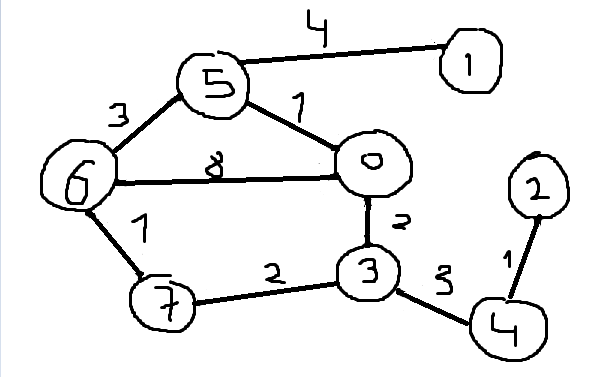

# **Caminho mais curto a partir de uma única origem**

Classe Grafo utilizada para aplicar o algoritmo que acha o caminho mais curto a partir de uma única origem. Um Grafo ponderado e direcionado.

In [ ]:
class Grafo(object):

    def __init__(self, vertices):
        self.vertices = {}
        self.nv = vertices
        
    def add_aresta(self, chave_de, chave_para, peso):
        if chave_de not in self.vertices:
            self.vertices[chave_de] = {}
        if chave_para not in self.vertices:
            self.vertices[chave_para] = {}
        self.vertices[chave_de][chave_para] = peso

    def mostraGrafo(self):
        for x in self.vertices.items():
            print(x)

    def get_vertices(self):
    # retorna list type e nao dict_keys type
        return (list(self.vertices.keys()))

    def get_adjacentes(self, chave):
        return (list(self.vertices[chave].keys()))

    def get_pesosAdjacentes(self, chave):
        return (list(self.vertices[chave].values()))

Algoritmo implementado. Foi escolhido o algoritmo de Dijkstra.

Levando em conta o grafo G e a origem r, o algoritmo retorna os pais de u, e a distância de u a r.

In [ ]:
#Algoritmo de Dijkstra
def dij(G, r):

    # Declaração
    r_dist = {} # dicionário das distâncias de u até r
    r_pai = {} # dicionário dos pais de cada node u
    g_vert = G.get_vertices() # lista de verices de G

    inf = float('inf') # infinito utilizado na comparação da distância

    # Inicialização
    for u in g_vert:
        r_dist[u] = inf # Vertices a uma dist infinita de r
        r_pai[u] = None # Todos sem pai
    r_dist[r] = 0 # Dist do início (r) até o início (r) = 0

    Q = g_vert # Queue
    u = r # Começar do início

    #Algoritmo de Dijkstra
    while Q != []:
        for u in Q:
            for i in Q:
                if r_dist[u] >= r_dist[i] and r_dist[u] >= 0:
                    u = i
        
        Q.remove(u)
        u_adj = G.get_adjacentes(u) # Vertices v adjacentes a u
        # Pesos dos vertices v
        u_pesos = dict(zip(u_adj, G.get_pesosAdjacentes(u))) 

        # Ralaxamento de (u, v, u_pesos)
        for v in u_adj:
            if (r_dist[v] > (r_dist[u] + u_pesos[v])):
                r_dist[v] = r_dist[u] + u_pesos[v]
                r_pai[v] = u


    return r_pai, r_dist

Algoritmo menorC(G, r, s), que utiliza do dijkstra para encontrar o menor caminho de um ponto a outro. Utiliza do Grafo G, do início r e do fim s. 

Retorna uma lista com a ordem dos grafos que compões o caminho mais curto de r até s, e o valor da distância entre r e s (inf se não é possível chegar de r à s).

In [ ]:
# Algoritmo Menor Caminho
def menorC(G,r,s):
    # Chamar dijkstra para obter os pais e dists a partir de r
    pai, dist = dij(G, r) 
    caminho = [] # Inicializar o caminho como r

    s_dist = dist[s] # Guardar a dist de s até r
    j = pai[s] # Guardar o pai de s (para começar a lista dos caminhos)

    # Se ambos forem iguais, o caminho é apenas ele mesmo.
    if r == s:
        return [s], s_dist

    # Se j == None, j não tem pai, e não há um caminho de r até ele
    if j == None:
            return [], s_dist
    
    # Inserção dos nós ao caminho. Feita de trás para a frente,
    # inserindo os pais no começo
    caminho.insert(0,s)
    while j != r:
        caminho.insert(0,j)
        j = pai[j]

    caminho.insert(0,r)

    return caminho, s_dist

Teste realizado a partir do grafo abaixo

In [ ]:
#Teste

#Criação de um grafo
G = Grafo(8)
G.add_aresta(6, 0, 8) #Grafo criado fora de ordem para testar
G.add_aresta(6, 5, 3)
G.add_aresta(6, 7, 1)

G.add_aresta(0, 3, 2)
G.add_aresta(0, 6, 8)

G.add_aresta(3, 0, 2)
G.add_aresta(3, 7, 2)

G.add_aresta(4, 2, 1)
G.add_aresta(4, 3, 3)

G.add_aresta(5, 0, 1)
G.add_aresta(5, 1, 4)

G.add_aresta(7, 6, 1)

c, d = menorC(G,0,1)
# Print:
print("0 --> 1")
print(c)
print("Dist: " +  str(d))
print("\n")

c, d = menorC(G,4,5)
# Print:
print("4 --> 5")
print(c)
print("Dist: " +  str(d))
print("\n")

c, d = menorC(G,2,2)
# Print:
print("2 --> 2")
print(c)
print("Dist: " +  str(d))
print("\n")

c, d = menorC(G,0,2)
# Print:
print("0 --> 2")
print(c)
print("Dist: " +  str(d))
print("\n")

0 --> 1
[0, 3, 7, 6, 5, 1]
Dist: 12


4 --> 5
[4, 3, 7, 6, 5]
Dist: 9


2 --> 2
[2]
Dist: 0


0 --> 2
[]
Dist: inf




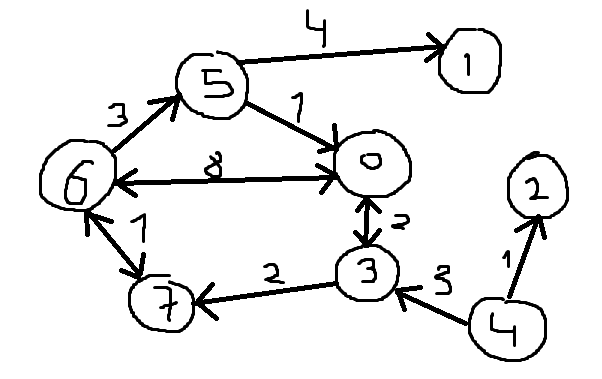